In [2]:
import shutil
import sys
import os
from glob import glob
from importlib import reload

print("Loading...")
sys.path.insert(0, "/home/2649/repos/TRANSSClass/scripts")
import TRANSSC_utils

"""Import community packages"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

R_vals = [
    738, 700, 600, 500, 400, 300,
    200, 175, 150, 125, 100,
    90, 80, 70, 60, 50,
    45, 40, 35, 30, 25, 20, 15, 10, 5
]

Loading...


In [23]:
import SNIDsn
lnws = TRANSSC_utils.SESNtemple_DATA


SNs = []
SNtypes = []
SNtypes_str = []
specs = []
spectypes = []

for lnw in lnws:
    spec = SNIDsn.SNIDsn()
    spec.loadSNIDlnw(lnw)
    SNtype = TRANSSC_utils.SNtypes_str_to_int[spec.header["TypeStr"]]

    if spec.header["TypeStr"] in ["Ib-pec", "Ibn", "Ic-pec"]:
        continue
    
    SNs.append(spec.header["SN"])
    SNtypes.append(SNtype)
    SNtypes_str.append(spec.header["TypeStr"])

    for phase in spec.phases:
        specs.append(phase)
        spectypes.append(SNtype)

In [24]:
np.unique(SNtypes_str)

array(['IIb', 'Ib', 'Ib-norm', 'Ic', 'Ic-broad', 'Ic-norm'], dtype='<U8')

(array([29., 23.,  0., 50.]),
 array([ 6.  ,  7.25,  8.5 ,  9.75, 11.  ]),
 <BarContainer object of 4 artists>)

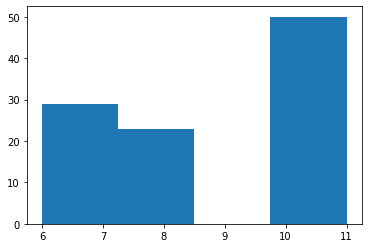

In [25]:
plt.hist(SNtypes, bins=len(np.unique(SNtypes)))

In [26]:
np.unique(SNtypes)

array([ 6,  8, 10, 11])

In [28]:
TRANSSC_utils.SNtypes_int_to_str[6]

'Ib-norm'

In [29]:
TRANSSC_utils.SNtypes_int_to_str[8]

'IIb'

In [30]:
TRANSSC_utils.SNtypes_int_to_str[10]

'Ic-norm'

In [32]:
TRANSSC_utils.SNtypes_int_to_str[11]

'Ic-broad'

In [33]:
np.bincount(SNtypes)

array([ 0,  0,  0,  0,  0,  0, 29,  0, 23,  0, 24, 26])

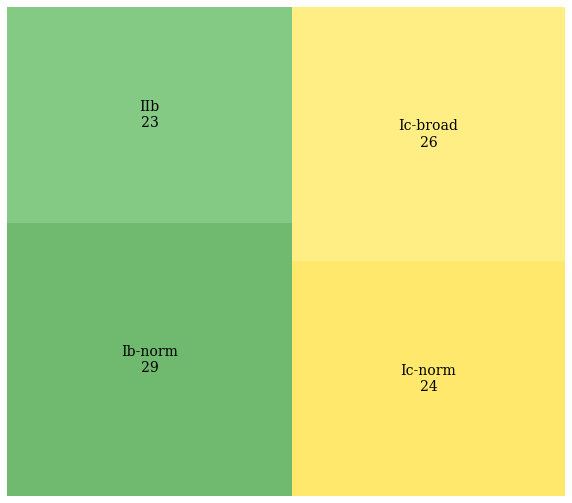

In [35]:
values = [29, 23, 24, 26]
labels = ["Ib-norm\n29", "IIb\n23", "Ic-norm\n24", "Ic-broad\n26"]
data = {"labels": labels, "values": values}
df = pd.DataFrame(data)

colors = [
    "#118c11",
    "#32a632",
    "#ffda0a",
    "#ffe433",
]

plt.style.use("https://raw.githubusercontent.com/FoxFortino/stylefile/master/custom.mplstyle")

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"

plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.major.width"] = 1

plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.major.width"] = 1

plt.rcParams["axes.linewidth"] = 1

import squarify
import seaborn as sns



sizes = df["values"].values
label = df["labels"]
plt.figure(figsize=(10, 9))
squarify.plot(
    sizes=sizes,
    label=label,
    alpha=0.6,
    color=colors).set()

plt.axis('off')
plt.savefig("treemap_SESN_SN.png")
plt.show()

In [91]:
R = 738
MODEL_DIR = f"/lustre/lrspec/users/2649/models/transformer_testing/{R}"

In [92]:
data_trn = TRANSSC_utils.load_csv(os.path.join(MODEL_DIR, "data_trn.csv"))
data_tst = TRANSSC_utils.load_csv(os.path.join(MODEL_DIR, "data_tst.csv"))
L_trn, S_trn, P_trn, Y_trn, X_trn, df_trn = data_trn
L_tst, S_tst, P_tst, Y_tst, X_tst, df_tst = data_tst

In [93]:
df_all = pd.concat([df_trn, df_tst])
classes = df.groupby("lnw").apply(lambda x: x["target"][0]).to_numpy()

In [94]:
TRANSSC_utils.SNtypes_int = np.unique(Y_trn)
TRANSSC_utils.SNtypes_str = [TRANSSC_utils.SNtypes_int_to_str[sn] for sn in TRANSSC_utils.SNtypes_int]

In [95]:
values = np.bincount(classes)
values = np.bincount(df_all["target"])
labels = TRANSSC_utils.SNtypes_str

In [96]:
labels = [f"{label}\n{count}" for label, count in zip(labels, values)]

In [97]:
data = {"labels": labels, "values": values}
df = pd.DataFrame(data)
df

,labels,values
0,Ia-norm\n2109,2109
1,Ia-91T\n342,342
2,Ia-91bg\n232,232
3,Ia-csm\n14,14
4,Iax\n59,59
5,Ia-pec\n111,111
6,Ib-norm\n212,212
7,Ibn\n27,27
8,IIb\n240,240
9,Ib-pec\n12,12


In [98]:
colors = [
    "#1557c0",
    "#196bde",
    "#2382f7",
    "#4b9cf9",
    "#77b6fb",
    "#a4cefc",
    
    "#118c11",
    "#1f991f",
    "#32a632",
    "#47b347",
    
    "#ffda0a",
    "#ffe433",
    "#ffec5c",
    
    "#6818a5",
    "#ab51e3",
    "#dc97ff"
]

In [99]:
plt.style.use("https://raw.githubusercontent.com/FoxFortino/stylefile/master/custom.mplstyle")

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"

plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.major.width"] = 1

plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.major.width"] = 1

plt.rcParams["axes.linewidth"] = 1

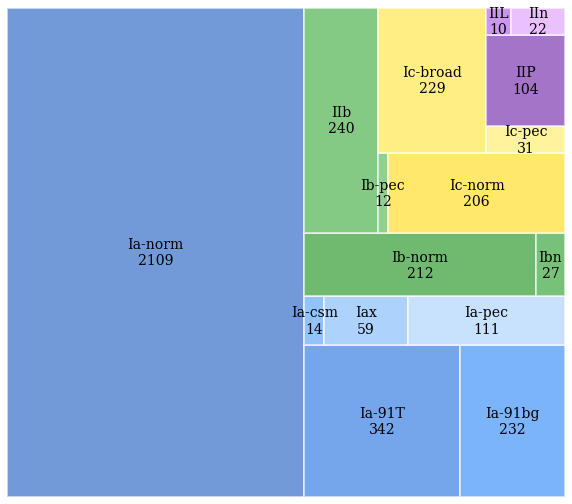

In [100]:
import squarify
import seaborn as sns



sizes = df["values"].values
label = df["labels"]
plt.figure(figsize=(10, 9))
squarify.plot(
    sizes=sizes,
    label=label,
    alpha=0.6,
    color=colors).set()

plt.axis('off')
plt.savefig("treemap_SP.png")
plt.show()

Figure X: A 'treemap' plot showing the distribution of TYPES OF spectra in this dataset. The area of each rectangle is proportional to the number of spectra. Blue, green, yellow, and purple rectangles denote supernova spectra with broad type Ia, Ib, Ic, and II, respectively. This figure illustrates how imbalanced our dataset is. This leads to many complciations including how to split the split the dataset for training and how to evaluate a model where some classes are barely represented. We choose to ensure that spectra from the same supernova are never split between the training and the testing sets. Further, we are careful to consider the "macro" F1 score, an alternative to Tensorflow's categorical accuracy metric, because it places equal importance on the precision and recall of all classes in the dataset.

people wont know ML TALK ABOUT NWHY CLASS IMABALANCE IS BAD